In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
Y_test = Y_test.reshape(-1,)
Y_train = Y_train.reshape(-1,)

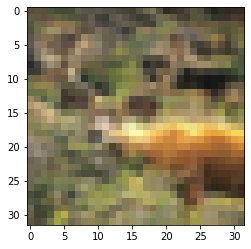

In [4]:
plt.imshow(X_train[98])
plt.show()

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(32,32,3)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))



2023-01-15 20:37:13.818354: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
model.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=1)


2023-01-15 20:37:15.557600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9245 - accuracy: 0.3084 - val_loss: 1.8118 - val_accuracy: 0.3511
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7296 - accuracy: 0.3886 - val_loss: 1.6663 - val_accuracy: 0.4079
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6303 - accuracy: 0.4215 - val_loss: 1.5807 - val_accuracy: 0.4350
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5522 - accuracy: 0.4452 - val_loss: 1.5347 - val_accuracy: 0.4461
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4829 - accuracy: 0.4678 - val_loss: 1.4684 - val_accuracy: 0.4738
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4304 - accuracy: 0.4885 - val_loss: 1.4486 - val_accuracy: 0.4789
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3881 - accuracy: 0.5028 - val_loss: 1.4520 -

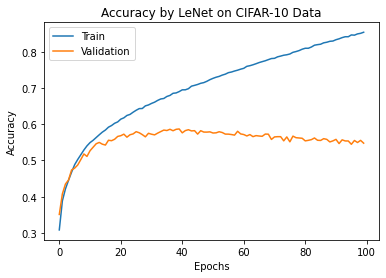

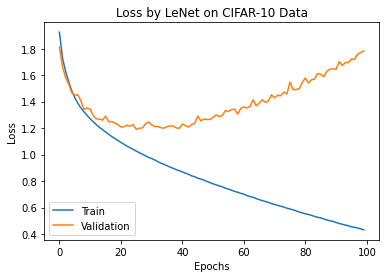

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
